In [2]:
!pip install pandas

In [44]:
!pip install numpy seaborn matplotlib

First 5 rows are: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

ValueError: At least one argument from "cellColours" or "cellText" must be provided to create a table.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


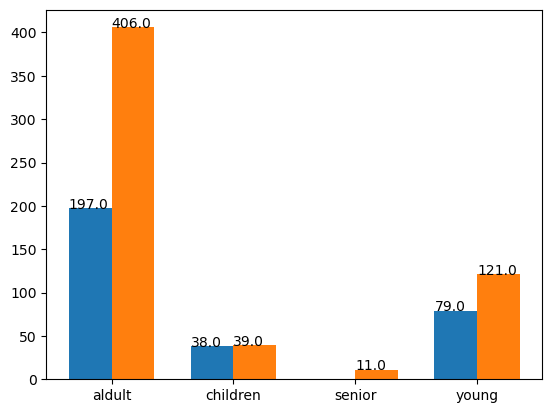

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset 
df = pd.read_csv(r'C:\Users\Hoang\Data analysis\Titanic - Machine Learning from Disaster\train.csv')

# first 5 rows
print(f"First 5 rows are: \n {df.head()}")

#dataset over view
print(df.info())

#CLEAN DATA

#count missing value from columns
print(f"Missing value: \n {df.isnull().sum()}")

#because many of the numbers of cabin and age values missing, we fill them with "Unknow" 
df["Cabin"] = df["Cabin"].fillna("Unknow")

#fill missing values in column"Age" with medium value
df["Age"] = df["Age"].fillna(df["Age"].median())

#filling missing values in column Embark with mode value
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

#count duplicate values 
print(f"Duplicated values : \n{df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

#check missing values after fill
print(f"After filling all missing value: \n{df.isnull().sum()}")
print(f"Describe of numeric data:\n{df.describe()}")
print(df.nunique())

# divide age group

df["Age group"] = df["Age"].apply(lambda x: 
                                  "children" if x<=14 else
                                  "young" if x<=24 else
                                  "aldult" if x<=64 else
                                  "senior")
a = df.groupby(["Age group","Sex"])["PassengerId"].count().unstack()
print(a)
plt.figure()
x = np.arange(len(a.index))
width = 0.35
bar1 = plt.bar(x-width/2,a["female"],width)
bar2 = plt.bar(x+width/2,a["male"],width)
plt.xticks(x,a.index)
for a in bar1:
    plt.text(a.get_xy()[0],a.get_height(),a.get_height())
for b in bar2:
    plt.text(b.get_xy()[0],b.get_height(),b.get_height())
row_labels = ["Female","Male"]
row_colors =["blue","orange"]
my_table = plt.table(
                     colWidths=[0.1] * 3,
                     rowLabels=row_labels,
                     rowColours=row_colors,
                     loc='upper right')
plt.show()





 




In [158]:
import pandas as pd

data = {"Age group": ["adult","children","young","senior"],
       "Pass":[197,406,38,39]}
df = pd.DataFrame(data)
df

,Age group,Pass
0,adult,197
1,children,406
2,young,38
3,senior,39


In [ ]:
"""width = 0.35
bar1 = plt.bar(x-width/2,a["female"],width)
bar2 = plt.bar(x+width/2,a["male"],width)
plt.show()
plt.xticks(x,a["Age group"])"""